# Artificial Intelligence Nanodegree

## Convolutional Neural Networks


In this notebook, we train a CNN to detect images of cells infected by malaria from those not.


In [113]:
#Import the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint 

In [114]:
#TODO List
#Add simple one-layer CNN to benchmark - DONE
#Add GPU IF-THEN-ELSE statement to set model compilation parameters accordingly - DONE
#Add Receiver Operating Characteristics (ROC) curves
#Add confusion matrix for the true label vs. predicted label of parasitized vs. uninfected

In [115]:
#Pre-process cell images

#Call ImageDataGenerator to generate batches of tensor image data with real-time 
#data augmentation. The data will be looped over (in batches).

train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

validation_datagen = ImageDataGenerator(rescale = 1./255)

#Set parameter to either evaluate full image set or just a subset for algorithm development
USE_FULL_IMAGE_SET = True

#Set image file path accordingly
if USE_FULL_IMAGE_SET == True:
    print("Using FULL image set\n")
    training_set_image_path = 'cell_images_full/train'
    test_set_image_path = 'cell_images_full/test'
    validation_set_image_path = 'cell_images_full/valid'
    
else:
    print("Using small SUBSET image set\n")
    training_set_image_path = 'cell_images_subset/train'
    test_set_image_path = 'cell_images_subset/test'
    validation_set_image_path = 'cell_images_subset/valid'
    
#Apply method "flow_from_directory" which takes the path to a directory & generates batches
#of augmented data, returning a "DirectoryIterator" yielding tuples of (x, y) where x is 
#a numpy array containing a batch of images with shape (batch_size, *target_size, channels) 
#and y is a numpy array of corresponding labels.

BATCH_SIZE = 32

#training_set = train_datagen.flow_from_directory('cell_images_full/train', 
training_set = train_datagen.flow_from_directory(training_set_image_path, 
                                                 target_size = (64, 64), 
                                                 batch_size = BATCH_SIZE, 
#                                                 class_mode = 'binary')
                                                 class_mode = 'categorical')
    
#test_set = test_datagen.flow_from_directory('cell_images_full/test', 
test_set = test_datagen.flow_from_directory(test_set_image_path, 
                                            target_size = (64, 64), 
                                            batch_size = BATCH_SIZE, 
#                                            class_mode = 'binary')
                                            class_mode = 'categorical')
    
#validation_set = validation_datagen.flow_from_directory('cell_images_full/valid', 
validation_set = validation_datagen.flow_from_directory(validation_set_image_path, 
                                                        target_size = (64, 64), 
                                                        batch_size = BATCH_SIZE, 
#                                                        class_mode = 'binary')
                                                        class_mode = 'categorical')

print("\nFinished pre-processing cell images")

Using FULL image set

Found 19290 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.

Finished pre-processing cell images


In [117]:
#Set training parameters based on whether running on GPU
USING_GPU = False

if USING_GPU == True:
    print("Running in GPU mode")
    NUMBER_STEPS_PER_EPOCH = 5000
    NUMBER_OF_EPOCHS = 10
    BATCH_SIZE = 32
    #NUMBER_VALIDATION_STEPS = len(validation_set.filenames)/BATCH_SIZE
    NUMBER_VALIDATION_STEPS = 2000
else:
    print("Running in CPU (not GPU) mode")
    NUMBER_STEPS_PER_EPOCH = 100
    NUMBER_OF_EPOCHS = 10
    BATCH_SIZE = 5
#    NUMBER_VALIDATION_STEPS = len(validation_set.filenames)/BATCH_SIZE
    NUMBER_VALIDATION_STEPS = 10
    
print("     # of steps per epoch  : ", NUMBER_STEPS_PER_EPOCH)
print("     # of epochs           : ", NUMBER_OF_EPOCHS)
print("     # of validation steps : ", NUMBER_VALIDATION_STEPS)
print("\n")

Running in CPU (not GPU) mode
     # of steps per epoch  :  100
     # of epochs           :  10
     # of validation steps :  10




In [118]:
#Create benchmark model

#Initializing the CNN
benchmark_model = Sequential()

#Step 1 - Convolution
benchmark_model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

#Step 2 - Pooling
benchmark_model.add(MaxPooling2D(pool_size = (2, 2)))
#TODO - Determine if dropout is needed.  If so, add it to full model
benchmark_model.add(Dropout(0.2))

#Step 3 - Flattening
benchmark_model.add(Flatten())

#Step 4 - Full connection
benchmark_model.add(Dense(units = 128, activation = 'relu'))
#benchmark_model.add(Dense(units = 1, activation = 'sigmoid'))
benchmark_model.add(Dense(units = 2, activation = 'softmax'))

#Compiling the CNN
benchmark_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print("finished compiling benchmark model")

finished compiling benchmark model


In [119]:
# train the benchmark model
BMcheckpointer = ModelCheckpoint(filepath='C:/Users/david/Documents/GitHub/Malaria-Detector-CNN/BMmodel.weights.best.hdf5', 
                                 verbose=1, 
                                 save_best_only=True)
    
#Fit the benchmark model
benchmark_model.fit_generator(training_set, 
                    steps_per_epoch = NUMBER_STEPS_PER_EPOCH, 
                    epochs = NUMBER_OF_EPOCHS, 
                    callbacks=[BMcheckpointer], 
                    validation_data = validation_set, 
                    validation_steps = NUMBER_VALIDATION_STEPS)
#                    validation_data = validation_set)

print("\nFinished benchmark model fitting of malaria-infected cell images to one-layer CNN")

Epoch 1/10
100/100 [==============================] - 199s - loss: 1.0693 - acc: 0.5931 - val_loss: 0.7537 - val_acc: 0.4938
Epoch 2/10
100/100 [==============================] - 205s - loss: 0.6223 - acc: 0.6491 - val_loss: 0.9740 - val_acc: 0.4313
Epoch 3/10
100/100 [==============================] - 143s - loss: 0.5861 - acc: 0.6928 - val_loss: 0.8073 - val_acc: 0.5188
Epoch 4/10
100/100 [==============================] - 134s - loss: 0.5837 - acc: 0.7037 - val_loss: 0.9991 - val_acc: 0.4813
Epoch 5/10
100/100 [==============================] - 129s - loss: 0.5525 - acc: 0.7325 - val_loss: 1.0362 - val_acc: 0.5969
Epoch 6/10
100/100 [==============================] - 125s - loss: 0.5557 - acc: 0.7153 - val_loss: 0.8180 - val_acc: 0.5781
Epoch 7/10
100/100 [==============================] - 38s - loss: 0.5417 - acc: 0.7366 - val_loss: 0.8905 - val_acc: 0.5750
Epoch 8/10
100/100 [==============================] - 36s - loss: 0.5332 - acc: 0.7313 - val_loss: 0.8171 - val_acc: 0.5651
Ep

In [120]:
# Load the benchmark model weights with the best validation loss.

benchmark_model.load_weights('C:/Users/david/Documents/GitHub/Malaria-Detector-CNN/BMmodel.weights.best.hdf5')

In [123]:
filenames = test_set.filenames
nb_samples = len(filenames)
print("nb_samples = ",nb_samples)

predict = benchmark_model.predict_generator(test_set,steps = nb_samples)

print("finished with predict generator")
print(predict.shape)
print(predict)

nb_samples =  5512
finished with predict generator
(175616, 2)
[[0.7097988  0.29020125]
 [0.54717845 0.45282152]
 [0.5288232  0.47117683]
 ...
 [0.48646826 0.51353174]
 [0.53901446 0.46098545]
 [0.5439702  0.45602977]]


In [124]:
#Step 8 - Calculate the Classification Accuracy on the Test Set
#TODO: Re-evaluate step size

score = benchmark_model.evaluate_generator(validation_set, 400)

accuracy = 100*score[1]

print('Benchmark Test accuracy: %.4f%%' % accuracy)

Benchmark Test accuracy: 50.8689%


In [125]:
#Create model

#Initializing the CNN
model = Sequential()

#Step 1 - Convolution
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

#Step 2 - Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

#Adding a second convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

#adding 3rd layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

#Step 3 - Flattening
model.add(Flatten())

#Step 4 - Full connection
model.add(Dense(units = 128, activation = 'relu'))
#model.add(Dense(units = 1, activation = 'sigmoid'))
model.add(Dense(units = 2, activation = 'softmax'))

#Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print("finished compiling")

model.summary()

print("finished summary")

finished compiling
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 1152)              0 

In [126]:
# train the model
MLcheckpointer = ModelCheckpoint(filepath='C:/Users/david/Documents/GitHub/Malaria-Detector-CNN/MLmodel.weights.best.hdf5', 
                                 verbose=1, 
                                 save_best_only=True)
    
#Fit the model
model.fit_generator(training_set, 
                    steps_per_epoch = NUMBER_STEPS_PER_EPOCH, 
                    epochs = NUMBER_OF_EPOCHS, 
                    callbacks=[MLcheckpointer], 
                    validation_data = validation_set, 
                    validation_steps = NUMBER_VALIDATION_STEPS)

print("\nFinished model fitting of malaria-infected cell images to 3 layer CNN")

Epoch 1/10
100/100 [==============================] - 35s - loss: 0.6755 - acc: 0.5828 - val_loss: 0.7030 - val_acc: 0.4594
Epoch 2/10
100/100 [==============================] - 32s - loss: 0.5549 - acc: 0.7146 - val_loss: 0.9388 - val_acc: 0.6188
Epoch 3/10
100/100 [==============================] - 32s - loss: 0.3440 - acc: 0.8622 - val_loss: 0.4247 - val_acc: 0.8063
Epoch 4/10
100/100 [==============================] - 31s - loss: 0.2301 - acc: 0.9200 - val_loss: 0.3071 - val_acc: 0.8904
Epoch 5/10
100/100 [==============================] - 30s - loss: 0.2134 - acc: 0.9287 - val_loss: 0.2960 - val_acc: 0.9000
Epoch 6/10
100/100 [==============================] - 32s - loss: 0.1522 - acc: 0.9506 - val_loss: 0.2358 - val_acc: 0.9250
Epoch 7/10
100/100 [==============================] - 31s - loss: 0.1707 - acc: 0.9459 - val_loss: 0.2012 - val_acc: 0.9375
Epoch 8/10
100/100 [==============================] - 31s - loss: 0.1563 - acc: 0.9527 - val_loss: 0.2859 - val_acc: 0.9094
Epoch 9/

In [127]:
# Load the ML model weights with the best validation loss.

model.load_weights('C:/Users/david/Documents/GitHub/Malaria-Detector-CNN/MLmodel.weights.best.hdf5')

In [128]:
filenames = test_set.filenames
nb_samples = len(filenames)
print("nb_samples = ",nb_samples)

predict = model.predict_generator(test_set,steps = nb_samples)

print("finished with predict generator")
print(predict.shape)
print(predict)

nb_samples =  5512
finished with predict generator
(175616, 2)
[[9.7732985e-01 2.2670140e-02]
 [9.9932849e-01 6.7148381e-04]
 [2.9749038e-02 9.7025090e-01]
 ...
 [1.0865383e-02 9.8913455e-01]
 [1.6246026e-02 9.8375398e-01]
 [9.8646498e-01 1.3535058e-02]]


In [129]:
#Step 8 - Calculate the Classification Accuracy on the Test Set
#TODO: Re-evaluate step size

score = model.evaluate_generator(validation_set, 400)

accuracy = 100*score[1]

print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 92.4487%


In [ ]:
#create output .csv file for testing

In [111]:
#from sklearn.metrics import confusion_matrix
#import numpy as np

#y_true = np.array([0] * 400 + [1] * 400)
#y_pred = predict > 0.5

#confusion_matrix(y_true, y_pred)

In [110]:
#TODO - copy to benchmark section once working

import pandas as pd

y_pred = pd.DataFrame(columns=["task_1", "task_2"])

for ii in range(len(predict)):
    #path = test_files[ii]
    #ML_prediction = np.argmax(MLmodel.predict(np.expand_dims(test_tensors[ii], axis=0)))
    #UN_prediction = np.argmax(UNmodel.predict(np.expand_dims(test_tensors[ii], axis=0)))
    y_pred.loc[ii] = [0, 0]
    if predict[ii][0] >= 0.5:
        y_pred.loc[ii]['task_1'] = 1
    else:
        y_pred.loc[ii]['task_2'] = 1

y_pred.to_csv("C:/Users/david/Documents/GitHub/Malaria-Detector-CNN/predictions.csv")

print("produced .csv file")

produced .csv file


In [ ]:
#Internal Testing vs. Ground Truths

In [ ]:
import itertools
import keras
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import roc_curve, auc, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator

def plot_roc_auc(y_true, y_pred):
    """
    This function plots the ROC curves and provides the scores.
    """

    # initialize dictionaries and array
    fpr = dict()
    tpr = dict()
    roc_auc = np.zeros(3)
    
    # prepare for figure
    plt.figure()
    colors = ['aqua', 'cornflowerblue']

    # for both classification tasks (categories 1 and 2)
    for i in range(2):
        # obtain ROC curve
        fpr[i], tpr[i], _ = roc_curve(y_true[:,i], y_pred[:,i])
        # obtain ROC AUC
        roc_auc[i] = auc(fpr[i], tpr[i])
        # plot ROC curve
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
                 label='ROC curve for task {d} (area = {f:.2f})'.format(d=i+1, f=roc_auc[i]))
    # get score for category 3
    roc_auc[2] = np.average(roc_auc[:2])
    
    # format figure
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curves')
    plt.legend(loc="lower right")
    plt.show()
    
    # print scores
    for i in range(3):
        print('Category {d} Score: {f:.3f}'. format(d=i+1, f=roc_auc[i]))

def plot_confusion_matrix(y_true, y_pred, thresh, classes):
    """
    This function plots the (normalized) confusion matrix.
    """

    # obtain class predictions from probabilities
    y_pred = (y_pred>=thresh)*1
    # obtain (unnormalized) confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # normalize confusion matrix
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
#TODO - copy to benchmark section once working

preds_path = sys.argv[1]
thresh = 0.5

# get ground truth labels for test dataset
truth = pd.read_csv('C:/Users/david/Documents/GitHub/Malaria-Detector-CNN/ground_truth.csv')
y_true = truth.as_matrix(columns=["task_1", "task_2"])

# get model predictions for test dataset
y_pred = pd.read_csv("C:/Users/david/Documents/GitHub/Malaria-Detector-CNN/predictions.csv")
y_pred = y_pred.as_matrix(columns=["task_1", "task_2"])

# plot ROC curves and print scores
plot_roc_auc(y_true, y_pred)
# plot confusion matrix
classes = ['uninfected', 'parasitized']
plot_confusion_matrix(y_true[:,0], y_pred[:,0], thresh, classes)

In [ ]:
#From Original...

In [ ]:
from sklearn.datasets import load_files
from keras.utils import np_utils
import numpy as np
import pandas as pd
from glob import glob
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from tqdm import tqdm
from PIL import ImageFile
import os
import pickle
ImageFile.LOAD_TRUNCATED_IMAGES = True
#import torch
#from torchvision import datasets, transforms, models

print("finished importing files")

In [54]:
# define two-category encoding utility function
def two_category_one_hot(labels, flag_index):
    '''
    Convert a multi-category array of labels into a one-hot encoding of two categories only:
    the one to identify (malaria), and everything else (uninfected)
    labels:: 1D numpy array of labels
    flag_index:: index of the category that will be tagged as 1. All other categories will be recoded as 0
    '''
    #print("FUNCTION: two_category_one_hot")
    encoding = np.empty((0,2), 'float32')

    for ii in range(len(labels)):
        if labels[ii] == flag_index:
            encoding = np.append(encoding,np.array([[1.,0.]]), axis=0)
        else:
            encoding = np.append(encoding,np.array([[0.,1.]]), axis=0)
    return encoding

# define function to load train, test, and validation datasets
def load_dataset(path, shuffle):
    #test code
    #print("FUNCTION: load_dataset")
    data = load_files(path, shuffle=shuffle)
    file_paths = np.array(data['filenames'])

    #test code
    #print('np.array(data[filenames]) = ', np.array(data['filenames']) )
    #print('np.array(data[target]) = ', np.array(data['target']))
    
    #in this context:
    #     ML = malaria
    #     UN = uninfected

    ML_labels = two_category_one_hot(np.array(data['target']),0)
    UN_labels = two_category_one_hot(np.array(data['target']),2)
    return file_paths, ML_labels, UN_labels

# define functions to convert images into 4D tensors for convnets
def path_to_tensor(img_path):

    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    #img = image.load_img(img_path, target_size=(124, 124))
    
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

def paths_to_tensor(img_paths):
    #print("FUNCTION: paths_to_tensor")
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors) 

# define function to decide whether to load tensors from a saved pickle or raw images
#def load_tensors_and_labels(pickle_file, raw_file_path, shuffle, force=False):
def load_tensors_and_labels(pickle_file, raw_file_path, shuffle, force):
    #print("FUNCTION: load_tensors_and_labels")
    #print("force = ",force)
    pickle_file = os.path.join('.', pickle_file)
 
    if force or not os.path.exists(pickle_file):
        #test code
        #print('forced path')
        files, ML_labels, UN_labels = load_dataset(raw_file_path, shuffle)
        tensors = paths_to_tensor(files).astype('float32')/255
        with open(pickle_file, 'wb') as handle:
            pickle.dump([tensors, ML_labels, UN_labels], handle, protocol=pickle.HIGHEST_PROTOCOL)
        return tensors, ML_labels, UN_labels

    else:
        with open(pickle_file, 'rb') as handle:
            #test code
            #print('non-forced path')
            tensors, ML_labels, UN_labels = pickle.load(handle)        
        return tensors, ML_labels, UN_labels

In [55]:
#Set directories for later use
data_dir = 'C:/Users/david/Documents/GitHub/malaria/data'

train_dir = data_dir + '/train/'
valid_dir = data_dir + '/valid/'
test_dir = data_dir + '/test/'

print("finished setting up directories")

#Set force_update where True = create new pickle, False = use existing pickle
#Given the extreme amount of time to process the images, best to set True once, then false thereafter
force_update = True
shuffle = True

# Load data

train_tensors, train_ML_labels, train_UN_labels = load_tensors_and_labels('train_data_ensemble.pickle',train_dir, shuffle, force_update)
print("finished loading TRAIN tensors and labels")

valid_tensors, valid_ML_labels, valid_UN_labels = load_tensors_and_labels('valid_data_ensemble.pickle',valid_dir, shuffle, force_update)
print("finished loading VALID tensors and labels")

test_tensors, test_ML_labels, test_UN_labels = load_tensors_and_labels('test_data_ensemble.pickle',test_dir, shuffle, force_update)
print("finished loading TEST tensors and labels")

print("train_tensors shape = ", train_tensors.shape)
print("valid_tensors shape = ", valid_tensors.shape)
print("test_tensors shape = ", test_tensors.shape)

finished setting up directories


100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 321.73it/s]


finished loading TRAIN tensors and labels


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 291.61it/s]


finished loading VALID tensors and labels


100%|█████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 303.71it/s]


finished loading TEST tensors and labels
train_tensors shape =  (140, 224, 224, 3)
valid_tensors shape =  (20, 224, 224, 3)
test_tensors shape =  (40, 224, 224, 3)


In [56]:
train_ML_data = pd.DataFrame(train_ML_labels)
valid_ML_data = pd.DataFrame(valid_ML_labels)
test_ML_data = pd.DataFrame(test_ML_labels)

print(train_ML_data.sum(axis=0))
print(valid_ML_data.sum(axis=0))
print(test_ML_data.sum(axis=0))

0    70.0
1    70.0
dtype: float64
0    10.0
1    10.0
dtype: float64
0    20.0
1    20.0
dtype: float64


In [57]:
train_UN_data = pd.DataFrame(train_UN_labels)
valid_UN_data = pd.DataFrame(valid_UN_labels)
test_UN_data = pd.DataFrame(test_UN_labels)

print(train_UN_data.sum(axis=0))
print(valid_UN_data.sum(axis=0))
print(test_UN_data.sum(axis=0))

0      0.0
1    140.0
dtype: float64
0     0.0
1    20.0
dtype: float64
0     0.0
1    40.0
dtype: float64


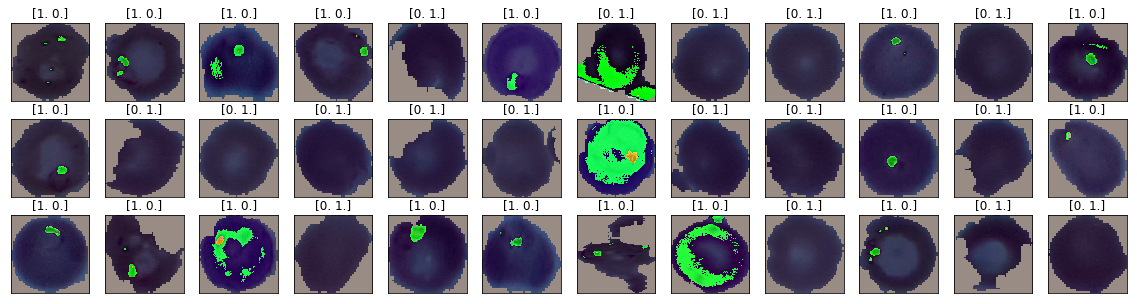

In [58]:
#Step 3 - View an image in more detail

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

#plot first 36 training images
    
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(train_tensors[i]))
    ax.set_title(str(train_ML_labels[i]))

In [59]:
#Step 4 - Rescale the images by dividing every pixel in every image by 255 - ALREADY DONE DURING PREPROCESSING!
#rescale [0,255] -> [0,1]
#train_tensors = train_tensors.astype('float32')/255
#valid_tensors = train_tensors.astype('float32')/255
#test_tensors = train_tensors.astype('float32')/255


In [60]:
#Step 5 - Encode categorical integer labels using a one-hot scheme

#print first ten (integer-valued) training labels
#print('Integer-valued labels:')
#print(train_ML_labels[:10])

#one-hot encode the labels - Done in pre-processing stage for ease!
#train_ML_labels = np.utils.to_categorical(train_ML_labels,10)
#valid_ML_labels = np.utils.to_categorical(valid_ML_labels,10)
#test_ML_labels = np.utils.to_categorical(test_ML_labels,10)

#print first ten (one-hot) training labels
print('First 5 one-hot ML (malaria) labels')
print('train_ML_labels:', train_ML_labels[:5])
print('valid_ML_labels:',valid_ML_labels[:5])
print('test_ML_labels:',test_ML_labels[:5])

print('First 5 one-hot UN (uninfected) labels')
print('train_UN_labels:', train_UN_labels[:5])
print('valid_UN_labels:',valid_UN_labels[:5])
print('test_UN_labels:',test_UN_labels[:5])

First 5 one-hot ML (malaria) labels
train_ML_labels: [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]
valid_ML_labels: [[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
test_ML_labels: [[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]
First 5 one-hot UN (uninfected) labels
train_UN_labels: [[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
valid_UN_labels: [[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
test_UN_labels: [[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [61]:
#Step 6 - Define the model architecture for ML
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

MLmodel = Sequential()
MLmodel.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(224, 224, 3)))
MLmodel.add(MaxPooling2D(pool_size=2))
MLmodel.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
MLmodel.add(MaxPooling2D(pool_size=2))
MLmodel.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
MLmodel.add(MaxPooling2D(pool_size=2))
MLmodel.add(Dropout(0.2))
MLmodel.add(Flatten())
MLmodel.add(Dense(128, activation='relu'))
MLmodel.add(Dropout(0.2))
#test of using sigmoid instead of softmax
#MLmodel.add(Dense(2, activation='softmax'))
MLmodel.add(Dense(2, activation='sigmoid'))

MLmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 64)      832       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 112, 112, 128)     32896     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 56, 56, 128)       65664     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 28, 28, 128)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 28, 28, 128)       0         
__________

In [62]:
# compile the model
#test of using adam instead of rmsprop
#MLmodel.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
MLmodel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [64]:
from keras.callbacks import ModelCheckpoint   

# train the model
MLcheckpointer = ModelCheckpoint(filepath='C:/Users/david/Documents/GitHub/malaria/MLmodel.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = MLmodel.fit(train_tensors, train_ML_labels, batch_size=32, epochs=10,
          validation_data=(valid_tensors, valid_ML_labels), callbacks=[MLcheckpointer], 
          verbose=2, shuffle=True, initial_epoch=0)

print("\nFinished model fitting of malaria-infected cell images")

Train on 140 samples, validate on 20 samples
Epoch 1/10
Epoch 00000: val_loss improved from inf to 0.69088, saving model to C:/Users/david/Documents/GitHub/malaria/MLmodel.weights.best.hdf5
42s - loss: 0.8402 - acc: 0.5071 - val_loss: 0.6909 - val_acc: 0.5000
Epoch 2/10
Epoch 00001: val_loss improved from 0.69088 to 0.62783, saving model to C:/Users/david/Documents/GitHub/malaria/MLmodel.weights.best.hdf5
39s - loss: 0.6211 - acc: 0.5893 - val_loss: 0.6278 - val_acc: 0.8250
Epoch 3/10
Epoch 00002: val_loss did not improve
38s - loss: 0.5234 - acc: 0.6857 - val_loss: 0.6687 - val_acc: 0.5500
Epoch 4/10
Epoch 00003: val_loss improved from 0.62783 to 0.48304, saving model to C:/Users/david/Documents/GitHub/malaria/MLmodel.weights.best.hdf5
39s - loss: 0.4460 - acc: 0.8000 - val_loss: 0.4830 - val_acc: 0.8500
Epoch 5/10
Epoch 00004: val_loss improved from 0.48304 to 0.43361, saving model to C:/Users/david/Documents/GitHub/malaria/MLmodel.weights.best.hdf5
41s - loss: 0.3292 - acc: 0.8500 -

In [39]:
# Load the ML model weights with the best validation loss.

MLmodel.load_weights('C:/Users/david/Documents/GitHub/malaria/MLmodel.weights.best.hdf5')

In [40]:
#Step 8 - Calculate the Classification Accuracy on the Test Set
score = MLmodel.evaluate(test_tensors,test_ML_labels, verbose=0)
accuracy = 100*score[1]

#print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 66.2500%


In [41]:
#Step 6 - Define the model architecture for SK (non-ML)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

UNmodel = Sequential()
UNmodel.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(224, 224, 3)))
#UNmodel.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', 
#                        input_shape=(124, 124, 3)))
UNmodel.add(MaxPooling2D(pool_size=2))
UNmodel.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
UNmodel.add(MaxPooling2D(pool_size=2))
UNmodel.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
UNmodel.add(MaxPooling2D(pool_size=2))
UNmodel.add(Dropout(0.2))
UNmodel.add(Flatten())
UNmodel.add(Dense(128, activation='relu'))
UNmodel.add(Dropout(0.2))
#test of using sigmoid instead of softmax
#UNmodel.add(Dense(2, activation='softmax'))
UNmodel.add(Dense(2, activation='sigmoid'))

UNmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 224, 224, 64)      832       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 112, 112, 128)     32896     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 56, 56, 128)       65664     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 28, 28, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 28, 28, 128)       0         
__________

In [42]:
# compile the model
#test of using adam instead of rmsprop
#UNmodel.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
UNmodel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [43]:
from keras.callbacks import ModelCheckpoint   

# train the model
UNcheckpointer = ModelCheckpoint(filepath='C:/Users/david/Documents/GitHub/malaria/UNmodel.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = UNmodel.fit(train_tensors, train_UN_labels, batch_size=32, epochs=10,
          validation_data=(valid_tensors, valid_UN_labels), callbacks=[UNcheckpointer], 
          verbose=2, shuffle=True)

print("\nFinished model fitting for uninfected cell images")

Train on 140 samples, validate on 20 samples
Epoch 1/10
Epoch 00000: val_loss improved from inf to 0.00000, saving model to C:/Users/david/Documents/GitHub/malaria/UNmodel.weights.best.hdf5
41s - loss: 0.1593 - acc: 0.8679 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 2/10
Epoch 00001: val_loss did not improve
37s - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 3/10
Epoch 00002: val_loss did not improve
37s - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 4/10
Epoch 00003: val_loss did not improve
38s - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 5/10
Epoch 00004: val_loss did not improve
37s - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 6/10
Epoch 00005: val_loss did not improve
37s - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 7/10
Epoch 00006: val_loss did not improve
37s - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.0

In [44]:
# Load the UN model weights with the best validation loss.

UNmodel.load_weights('C:/Users/david/Documents/GitHub/malaria/UNmodel.weights.best.hdf5')

In [45]:
#Step 8 - Calculate the Classification Accuracy on the Test Set
score = UNmodel.evaluate(test_tensors,test_UN_labels, verbose=0)
accuracy = 100*score[1]

#print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 100.0000%


In [46]:
#Create output .csv file for testing

In [47]:
import pandas as pd

y_pred = pd.DataFrame(columns=["task_1", "task_2"])

for ii in tqdm(range(len(test_tensors))):
    #path = test_files[ii]
    ML_prediction = np.argmax(MLmodel.predict(np.expand_dims(test_tensors[ii], axis=0)))
    UN_prediction = np.argmax(UNmodel.predict(np.expand_dims(test_tensors[ii], axis=0)))
    y_pred.loc[ii] = [0, 0]
    if ML_prediction == 1:
        y_pred.loc[ii]['task_1'] = 1
    if UN_prediction == 1:
        y_pred.loc[ii]['task_2'] = 1

y_pred.to_csv("C:/Users/david/Documents/GitHub/malaria/predictions.csv")

print("produced .csv file")

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:07<00:00,  5.91it/s]


produced .csv file


In [48]:
#Internal Testing vs. Ground Truths

In [49]:
import itertools
import keras
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import roc_curve, auc, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator

def plot_roc_auc(y_true, y_pred):
    """
    This function plots the ROC curves and provides the scores.
    """

    # initialize dictionaries and array
    fpr = dict()
    tpr = dict()
    roc_auc = np.zeros(3)
    
    # prepare for figure
    plt.figure()
    colors = ['aqua', 'cornflowerblue']

    # for both classification tasks (categories 1 and 2)
    for i in range(2):
        # obtain ROC curve
        fpr[i], tpr[i], _ = roc_curve(y_true[:,i], y_pred[:,i])
        # obtain ROC AUC
        roc_auc[i] = auc(fpr[i], tpr[i])
        # plot ROC curve
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
                 label='ROC curve for task {d} (area = {f:.2f})'.format(d=i+1, f=roc_auc[i]))
    # get score for category 3
    roc_auc[2] = np.average(roc_auc[:2])
    
    # format figure
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curves')
    plt.legend(loc="lower right")
    plt.show()
    
    # print scores
    for i in range(3):
        print('Category {d} Score: {f:.3f}'. format(d=i+1, f=roc_auc[i]))

def plot_confusion_matrix(y_true, y_pred, thresh, classes):
    """
    This function plots the (normalized) confusion matrix.
    """

    # obtain class predictions from probabilities
    y_pred = (y_pred>=thresh)*1
    # obtain (unnormalized) confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # normalize confusion matrix
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

C:\Users\david\Anaconda3\envs\dog-project\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\david\Anaconda3\envs\dog-project\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


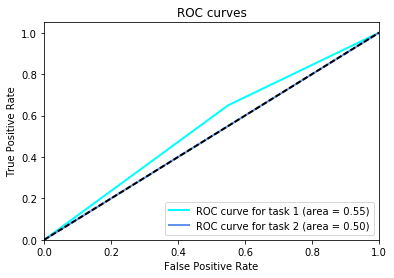

Category 1 Score: 0.550
Category 2 Score: 0.500
Category 3 Score: 0.525


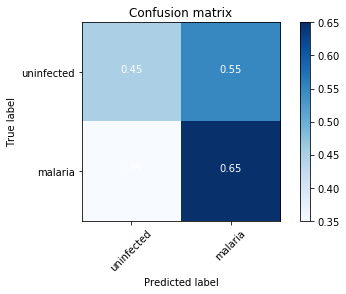

In [50]:
preds_path = sys.argv[1]
thresh = 0.5

# get ground truth labels for test dataset
truth = pd.read_csv('C:/Users/david/Documents/GitHub/malaria/ground_truth.csv')
y_true = truth.as_matrix(columns=["task_1", "task_2"])

# get model predictions for test dataset
y_pred = pd.read_csv("C:/Users/david/Documents/GitHub/malaria/predictions.csv")
y_pred = y_pred.as_matrix(columns=["task_1", "task_2"])

# plot ROC curves and print scores
plot_roc_auc(y_true, y_pred)
# plot confusion matrix
classes = ['uninfected', 'malaria']
plot_confusion_matrix(y_true[:,0], y_pred[:,0], thresh, classes)

In [ ]:
#Wrap-up: The VGG19 model  was way too complex to run on my computer causing it to crash and force me to manually cycle power 
#many, many times.  The preprocessing of the images takes about 1 hour.  The simplified model takes about 1.5 hours for the
#ML images, and a solid 2 hours for the non-ML images.
#It's understood the results above in the Confusion Matrix are, well, confusing.  Obviously something wrong but close enough
#for this go-around until I can get AWS running.